# Real or Not? NLP with Disaster Tweets

### 과연 Tweet의 게시물들이 정말로 disaster를 나타낸건지 아닌지 구별하는 것!

In [45]:
import pandas as pd
import numpy as np
import os
#os.chdir(r"../")
os.getcwd()

import matplotlib.pyplot as plt
import seaborn as sns
import string

# Data Load

In [40]:
train = pd.read_csv("./nlp-getting-started/train.csv")
test = pd.read_csv("./nlp-getting-started/test.csv")
sub_sample = pd.read_csv("./nlp-getting-started/sample_submission.csv")

print(train.shape, test.shape, sub_sample.shape)

(7613, 5) (3263, 4) (3263, 2)


In [41]:
train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [43]:
train.duplicated().sum()
train = train.drop_duplicates().reset_index(drop=True)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


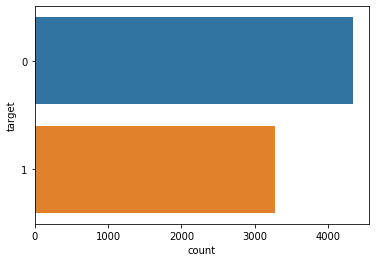

In [46]:
# Class Balance
train['target'].value_counts(normalize=True)
sns.countplot(y=train.target);

In [23]:
#NA data
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [47]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [50]:
#Check number of unique keywords, and whether they are the same for train and test sets
print(train.keyword.nunique(), test.keyword.nunique())
print()

221 221


In [67]:
train.keyword.value_counts().iloc[:15].index

Index(['fatalities', 'armageddon', 'deluge', 'sinking', 'harm', 'body%20bags',
       'damage', 'collided', 'twister', 'windstorm', 'outbreak', 'fear',
       'evacuate', 'siren', 'earthquake'],
      dtype='object')

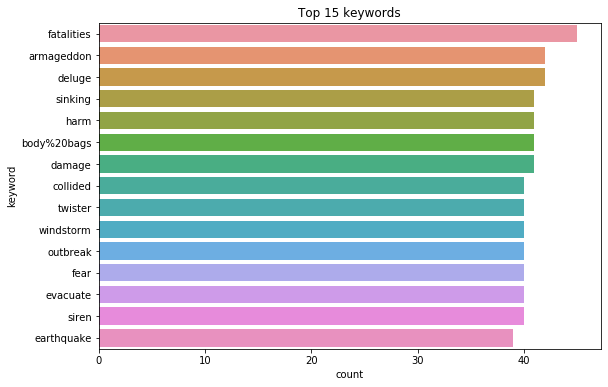

In [69]:
# Most common Keywords
plt.figure(figsize = (9,6))
sns.countplot(y=train.keyword, order=train.keyword.value_counts().iloc[:15].index)
plt.title("Top 15 keywords")
plt.show()

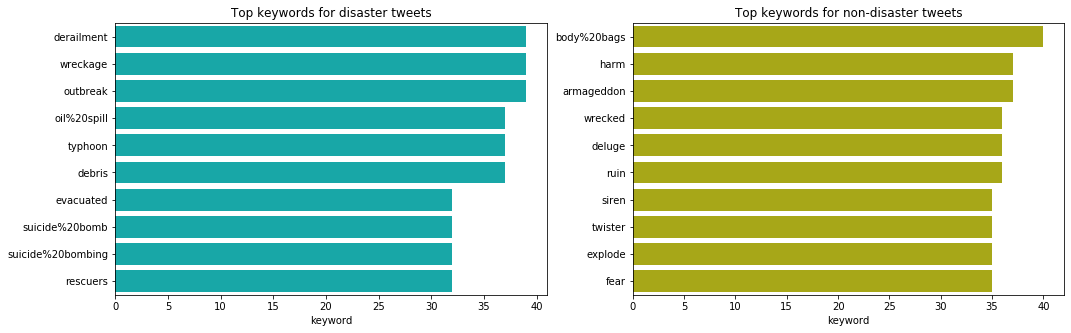

In [84]:
kw_d = train[train.target==1].keyword.value_counts().head(10)
kw_nd = train[train.target==0].keyword.value_counts().head(10)

plt.figure(figsize=(17,5))
plt.subplot(121)
sns.barplot(kw_d, kw_d.index, color='c')
plt.title('Top keywords for disaster tweets')
plt.subplot(122)
sns.barplot(kw_nd, kw_nd.index, color='y')
plt.title('Top keywords for non-disaster tweets')
plt.show()

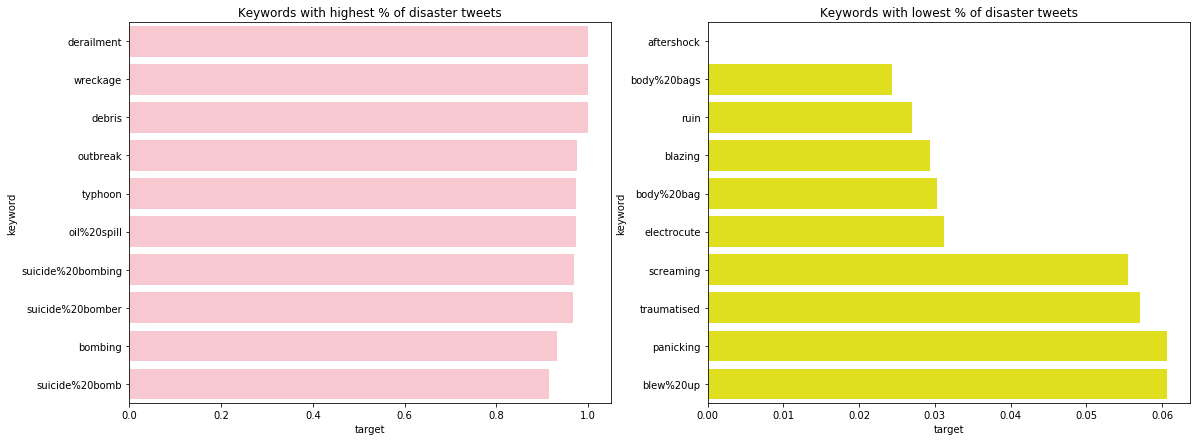

In [99]:
top_d = train.groupby('keyword').mean()['target'].sort_values(ascending=False).head(10)
top_nd = train.groupby('keyword').mean()['target'].sort_values().head(10)

plt.figure(figsize=(19,7))
plt.subplot(121)
sns.barplot(top_d, top_d.index, color='pink')
plt.title('Keywords with highest % of disaster tweets')
plt.subplot(122)
sns.barplot(top_nd, top_nd.index, color='yellow')
plt.title('Keywords with lowest % of disaster tweets')
plt.show()

# Location

In [ ]:
print(train)